# Downloading Dependencies 

In [1]:
# !pip install -r requirements.txt

# importing libraries

In [2]:
import torch
import matplotlib.pyplot as plt
import torchvision as torchvision
from typing import List
import json
import os

In [3]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

# Loading Model


In [4]:
model_path = './models/model_20_epoch.pth'
model = torch.load(model_path, map_location=torch.device('cpu'))
model.eval()

C:\Users\Mahendra Mandavkar\AppData\Local\Temp\ipykernel_12300\3245054832.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model = torch.load(model_path, map_location=tor

EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): MBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
            (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
            (fc2): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
            (activation): SiLU(inplace=True)
            (scale_activation): Sigmoid()
          )
          (2): Conv2dNormActivat

In [5]:
with open('./Data/class_names.json', 'r') as f:
    class_names = json.load(f)

In [6]:
# Define the transforms
weights = torchvision.models.EfficientNet_B0_Weights.DEFAULT
auto_transforms = weights.transforms()

# Model Prediciton

1. For Plotting

In [7]:
def pred_and_plot_image(
    model: torch.nn.Module,
    image_path: str,
    class_names: List[str] = None,
    transform = None,
    device = "cpu"):

    target_image = torchvision.io.read_image(str(image_path)).type(torch.float32)
    target_image = target_image / 255

    if transform:
        target_image = transform(target_image)
    model.to(device)
    model.eval()
    with torch.inference_mode():
        target_image = target_image.unsqueeze(0)
        target_image_pred = model(target_image.to(device))
        target_image_pred_probs = torch.softmax(target_image_pred, dim=1)
        target_image_pred_labels = torch.argmax(target_image_pred_probs, dim=1)

        # Normalize the image data to the range [0, 1] for plotting
        target_image = target_image.squeeze().permute(1, 2, 0).numpy()
        target_image = (target_image - target_image.min()) / (target_image.max() - target_image.min())

        plt.imshow(target_image)
        if class_names:
            title = f"Pred: {class_names[target_image_pred_labels.cpu()]} | Prob: {target_image_pred_probs.max().cpu():.3f}"
        else:
            title = f"Pred: {target_image_pred_labels} | Prob: {target_image_pred_probs.max().cpu():.3f}"
        plt.title(title)
        plt.axis(False)
        plt.show()

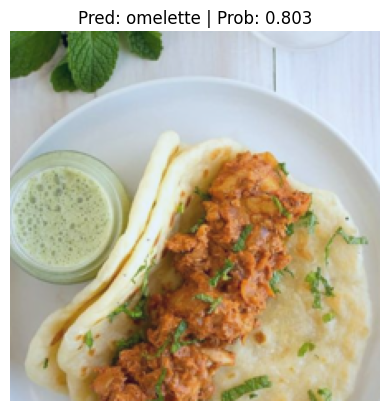

In [15]:
pred_and_plot_image(
    model=model,
    image_path="./Test_cases/051.jpg",
    class_names=class_names,
    transform=auto_transforms,
    device=device
)

2. For only ClassNames


In [9]:
# def pred_and_get_class_name(
#     model: torch.nn.Module,
#     image_path: str,
#     class_names: List[str] = None,
#     transform = None,
#     device = "cpu") -> str:

#     target_image = torchvision.io.read_image(str(image_path)).type(torch.float32)
#     target_image = target_image / 255

#     if transform:
#         target_image = transform(target_image)
#     model.to(device)
#     model.eval()
#     with torch.inference_mode():
#         target_image = target_image.unsqueeze(0)
#         target_image_pred = model(target_image.to(device))
#         target_image_pred_probs = torch.softmax(target_image_pred, dim=1)
#         target_image_pred_labels = torch.argmax(target_image_pred_probs, dim=1)

#         if class_names:
#             return class_names[target_image_pred_labels.cpu()]
#         else:
#             return str(target_image_pred_labels.cpu().item())

In [10]:
# def get_class_names_for_images(
#     model: torch.nn.Module,
#     image_dir: str,
#     class_names: List[str] = None,
#     transform = None,
#     device = "cpu") -> List[str]:

#     class_names_list = []

#     for image_name in os.listdir(image_dir):
#         image_path = os.path.join(image_dir, image_name)
#         class_name = pred_and_get_class_name(
#             model=model,
#             image_path=image_path,
#             class_names=class_names,
#             transform=transform,
#             device=device
#         )
#         class_names_list.append(class_name)

#     return class_names_list

In [ ]:
# test_cases_dir = "./Test_cases"
# class_names_list = get_class_names_for_images(
#     model=model,
#     image_dir=test_cases_dir,
#     class_names=class_names,
#     transform=auto_transforms,
#     device=device
# )

In [12]:
# class_names_list

# just for fun run all the files at once

In [13]:
# test_cases_dir = "./Test_cases"

# for image_name in os.listdir(test_cases_dir):
#     image_path = os.path.join(test_cases_dir, image_name)
#     pred_and_plot_image(
#         model=model,
#         image_path=image_path,
#         class_names=class_names,
#         transform=auto_transforms,
#         device=device
#     )